<br>

<b><font size=22>Machine learning and statistical learning</font></b>
### (Error measure, Overfitting)

**<font color = red>NGUYEN Thi Huong</font>**

**<font color = red>MASTER 2 EBDS</font>**

## 1. Context and objectives

## 2. First steps: preparing the data
**1. From AMeTICE, download the cars dataset (cars.csv).**

**2. Load the CSV file into R or Python.**

**3. Randomly split your dataset into two parts:**

a) a train set that will contain 80% of the observations

b) a test set that will contain the remaining 20%.

**4. From the train set, create two datasets:**

• a training set that will contain 80% of the observations from the train set

• a validation set that waill contain the remining 20%.

In [276]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [277]:
# I have public the data into a github link for all users can use this data without downloading.
link_file = "https://raw.githubusercontent.com/lilyhuong/Machine-learning-statistics/master/cars.csv"
df = pd.read_csv(link_file, index_col = 0)

In [278]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
name,,,,,,,,,,,
Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0


In [279]:
df.dtypes

year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

Firstly, we can see that in this dataframe, we 2 types of variables: integer and string. Because Python can not handle on charater variable, so we convert this variale into numerical variable. In this exercise, we need only 3 explantory variables: fuel, year, km driven, only "fuel" variable need to be converted to numericial type by using cat.codes

In [280]:
df.fuel = pd.Categorical(df.fuel)
df['fuel_num'] = df.fuel.cat.codes

In [281]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df["km_driven"] = min_max.fit_transform(df[["km_driven"]].values.reshape(-1, 1))
#df["selling_price"] = min_max.fit_transform(df["selling_price"].values.reshape(-1, 1))

In [282]:
y = df.selling_price    #set target variable 
X = df[["year", "fuel_num", "km_driven"]] #set 

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 8)

In [284]:
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state = 42)

## 3 Getting to know the data: descriptive statistics

#### 1. Compute some summary statistics for the whole dataset (and comment the outputs):
**• for numerical variables: mean, minimum, maximum, quartiles**

**• for categorical variables: for each category: proportion of observations; mean, minimum, maximum, quartiles of the target variable (selling_price)**


In [285]:
# Here we get all descriptive statistics for 4 variables: year, km_driven, fuel_num and selling_price
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_num
count,8128.000000,8.128000e+03,8128.000000,8128.000000,7907.000000,7912.000000,7907.000000,8128.000000
mean,2013.804011,6.382718e+05,0.029578,18.802005,1458.625016,91.517919,5.416719,1.891117
std,4.044249,8.062534e+05,0.023957,5.165302,503.916303,35.822499,0.959588,1.002313
min,1983.000000,2.999900e+04,0.000000,-1.000000,624.000000,0.000000,2.000000,0.000000
25%,2011.000000,2.549990e+05,0.014827,16.251852,1197.000000,68.050000,5.000000,1.000000
50%,2015.000000,4.500000e+05,0.025418,19.100000,1248.000000,82.000000,5.000000,1.000000
75%,2017.000000,6.750000e+05,0.041517,22.070000,1582.000000,102.000000,5.000000,3.000000
max,2020.000000,1.000000e+07,1.000000,42.000000,3604.000000,400.000000,14.000000,3.000000


In [286]:
len(df[df.year <= 1991])

2

In [287]:
df.fuel_num.value_counts(normalize=True)

1    0.541585
3    0.446727
0    0.007013
2    0.004675
Name: fuel_num, dtype: float64

In [288]:
df.fuel.unique()

['Diesel', 'Petrol', 'LPG', 'CNG']
Categories (4, object): ['CNG', 'Diesel', 'LPG', 'Petrol']

 Since the purpose of this exercise is to examine how to check overfitting in a model, the data was first considered for only 4 variables. The origine data shows that we have 8128 observations. However we can see the presence of missing values in engie, max_power and seats. A relevant aspect to mention is that in the original database once we generate this variable, we found that there were some cases for which this variable was extremely high(small) (outliers): for example, "km_driven" and "year" with only 2 values . Furthurmore, look at the fuel variable, about 99% of people prefer using petrol(54,15% equals to 4402 indivisuals) and next is Dielsel with 44,67%. Therefore this data presence of imbalance in feature, this issue can be addressed by imposing proportional weight loss, while fitting the model.

In [289]:
df.describe(include = "all")

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,fuel_num
count,8128.000000,8.128000e+03,8128.000000,8128,8128,8128,8128,8128.000000,7907.000000,7912.000000,7907.000000,8128.000000
unique,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,4402,6766,7078,5289,NaN,NaN,NaN,NaN,NaN
mean,2013.804011,6.382718e+05,0.029578,NaN,NaN,NaN,NaN,18.802005,1458.625016,91.517919,5.416719,1.891117
std,4.044249,8.062534e+05,0.023957,NaN,NaN,NaN,NaN,5.165302,503.916303,35.822499,0.959588,1.002313
min,1983.000000,2.999900e+04,0.000000,NaN,NaN,NaN,NaN,-1.000000,624.000000,0.000000,2.000000,0.000000
25%,2011.000000,2.549990e+05,0.014827,NaN,NaN,NaN,NaN,16.251852,1197.000000,68.050000,5.000000,1.000000
50%,2015.000000,4.500000e+05,0.025418,NaN,NaN,NaN,NaN,19.100000,1248.000000,82.000000,5.000000,1.000000
75%,2017.000000,6.750000e+05,0.041517,NaN,NaN,NaN,NaN,22.070000,1582.000000,102.000000,5.000000,3.000000


#### 2. Create graphs to show the relationship between the target variable and the explanatory variables. Comment on these.

Text(0, 0.5, 'Selling price')

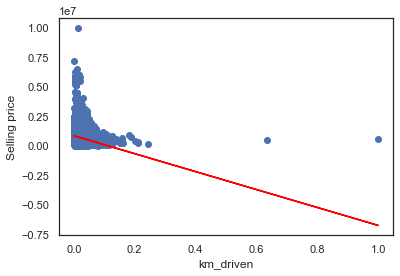

In [290]:
X = df.km_driven
#create basic scatterplot
plt.plot(X, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(X, y, 1)

#add linear regression line to scatterplot 
plt.plot(X, m * X + b, color = "red")
plt.xlabel("km_driven")
plt.ylabel("Selling price")

This graph illustrate a strong negative correlation between the selling price of a motor and number of Kilometres the car is driven

Text(0, 0.5, 'Selling price')

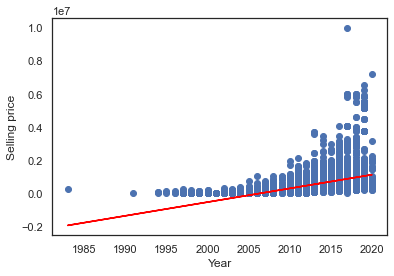

In [291]:
X = df.year
#create basic scatterplot
plt.plot(X, y, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(X, y, 1)

#add linear regression line to scatterplot 
plt.plot(X , m * X + b, color = "red")
plt.xlabel("Year")
plt.ylabel("Selling price")

The correlation between two variables is positive. We can simplify why car pricing are rasing overyear : high demand and limited supplies, inflation is another factor of increasing in price. 

Text(0, 0.5, 'Selling price')

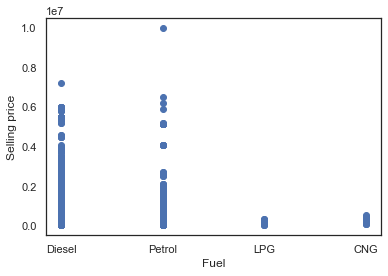

In [292]:
X = df.fuel
#create basic scatterplot
plt.plot(X, y, 'o')
plt.xlabel("Fuel")
plt.ylabel("Selling price")

As I had explainded in summary statistics, we can see implanced data in feature by this graph

Another relevant point that may affect classification performance is the correlation between features: the presence of highly correlated features may lead to a decrease in the performance of some classification algorithms that assume that the predictors are all independent. In another way, I will show these correlation between features and the depedent variable by Peason's correlation

/var/folders/q2/tks8t2v53c95y3jqch98mqrc0000gn/T/ipykernel_84347/2338550395.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


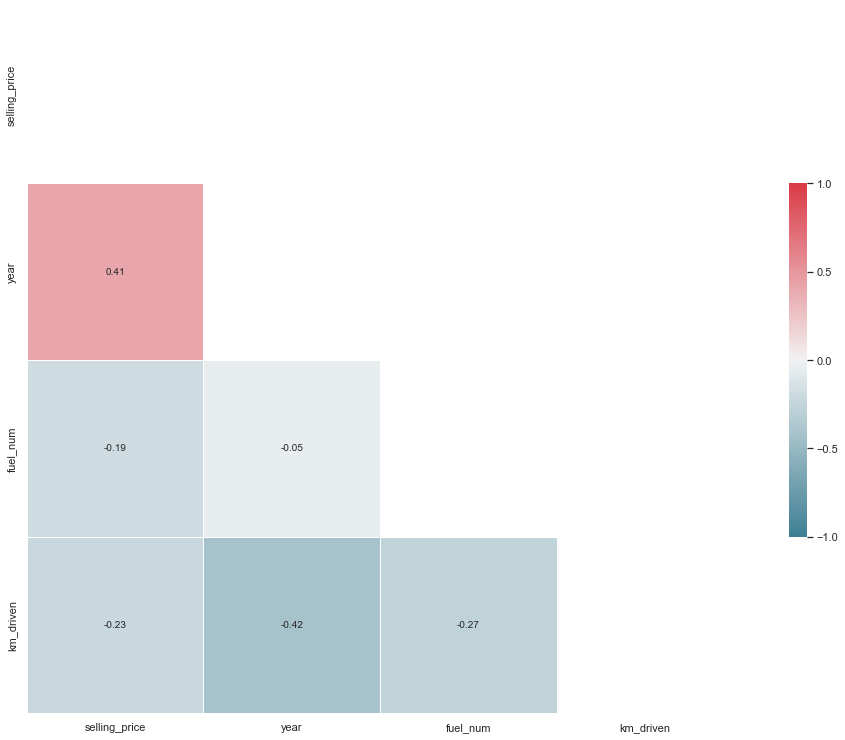

In [293]:
sns.set(style="white", font_scale=1)
numeric = ["selling_price", "year", "fuel_num", "km_driven" ]
corr = df[numeric].corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 13))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cmap=cmap, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 10})
cbar=ax.collections[0].colorbar
cbar.set_ticks([-1, -0.50, 0, 0.50, 1])
plt.savefig('Fig - Correlation matrix by means of the Pearson’s coefficient for all feature pairs.png')

## 4.  Estimations
**You will train two different models: a random forest and a SVM. You will understand in more
details how both algorithm work in the subsequent lessons. For now, all you need to understand
is that you can vary some hyperparameters for both models.**

**Among the different values that you will try for these hyperparameters, you need to select which provides the best fit, on the
validation set.**

**Using a random forest algorithm, predict the selling price of the car in the training set.**

**Use the following variables: year, fuel, km_driven.**

**If you use R, you can use the randomForest function from { randomForest }. If you use
Python, you can use the RandomForestRegressor function from sklearn.ensemble. You
will use the following hyperparameters for the algorithm:**

In [322]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,fuel_num
name,,,,,,,,,,,,
Maruti Swift Dzire VDI,2014,450000,0.061640,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,1
Skoda Rapid 1.5 TDI Ambition,2014,370000,0.050837,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,1
Honda City 2017-2020 EXi,2006,158000,0.059310,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,3
Hyundai i20 Sportz Diesel,2010,225000,0.053803,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,1
Maruti Swift VXI BSIII,2007,130000,0.050837,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
Hyundai i20 Magna,2013,320000,0.046601,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,3
Hyundai Verna CRDi SX,2007,135000,0.050414,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,1
Maruti Swift Dzire ZDi,2009,382000,0.050837,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0,1


In [323]:
from sklearn.ensemble import RandomForestRegressor


In [324]:
#creat random forest classifier object
regr = RandomForestRegressor(max_features = 3,  n_estimators = 20, min_samples_leaf = 10)
#train model
regr.fit(X_train_val, y_train_val)

RandomForestRegressor(max_features=3, min_samples_leaf=10, n_estimators=20)

In [325]:
prediction_random = regr.predict(X_val)
prediction_random

array([ 424559.36279939,  380219.53380941, 1018646.93925005, ...,
        344158.61000847,  772709.82638115,  143677.72498808])

### 2. Compute the mean squared error both for the training and the validation datasets. Compare them with each other.

In [326]:
from sklearn.metrics import mean_squared_error

In [327]:
#for train data set
prediction_random1 = regr.predict(X_train_val)
mse_train = mean_squared_error(y_train_val, prediction_random1)
print(mse_train)

218836517106.0499


In [328]:
mse_val = mean_squared_error(y_val, prediction_random )
print(mse_val)

267685257064.17752


In [329]:
mse_train < mse_val

True

In this case, MSE in training set is smaller than validation set. So it means the model present of overfitting. However, 
To get a better machine learning-based model, MSE of training and testing (predictions)(in this exercise is validation set) should be similar. In other words, the difference in MSE obtained during model training and  should validation be relatively small. Therefore, we will move on next part. 

### 3. Now, using a loop, make the minimum size of terminal nodes vary as follows: 10, 20,30, . . . , 100. At each iteration, compute the mean squared error (and store it) for both samples.

In [330]:
def mse_compute(Xval, yval):
    global list_MSE
    list_MSE = []
    for i in range(10,101, 10):
        #create a model 
        regr = RandomForestRegressor(max_features = 3,  n_estimators = 20, min_samples_leaf = i)
        #train model
        regr.fit(X_train_val, y_train_val)
        #predict value for valid set
        prediction_random = regr.predict(Xval)
        #calculate MSE
        mse = mean_squared_error(yval, prediction_random )
        list_MSE.append(mse)
        print("With {} of terminal node, the mean squared error is {}".format(i, mse))
    

Mean squarred error for train sample 

In [331]:
mse_compute(X_train_val, y_train_val)
list_MSE_train = list_MSE

With 10 of terminal node, the mean squared error is 218561606499.9016
With 20 of terminal node, the mean squared error is 246406277670.69168
With 30 of terminal node, the mean squared error is 283714841539.6625
With 40 of terminal node, the mean squared error is 311303566489.17316
With 50 of terminal node, the mean squared error is 325676170868.3977
With 60 of terminal node, the mean squared error is 330165257881.3612
With 70 of terminal node, the mean squared error is 340684896718.8482
With 80 of terminal node, the mean squared error is 360542016480.5107
With 90 of terminal node, the mean squared error is 372496390369.74634
With 100 of terminal node, the mean squared error is 376261069637.5171


Mean squarred error for validation sample 

In [332]:
mse_compute(X_val, y_val)
list_MSE_val = list_MSE

With 10 of terminal node, the mean squared error is 271299637952.189
With 20 of terminal node, the mean squared error is 284432242144.28674
With 30 of terminal node, the mean squared error is 333096104717.7838
With 40 of terminal node, the mean squared error is 354964976564.1161
With 50 of terminal node, the mean squared error is 365234241280.044
With 60 of terminal node, the mean squared error is 375612701613.0254
With 70 of terminal node, the mean squared error is 375291784354.19055
With 80 of terminal node, the mean squared error is 391389695723.0002
With 90 of terminal node, the mean squared error is 401806814778.5281
With 100 of terminal node, the mean squared error is 407912612711.06256


### 4. On a graph, plot the mean squared error as a function of the node size, for both samples (one curve for each sample). Comment.

In [333]:
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

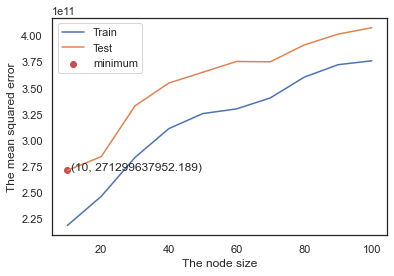

In [365]:
x = np.array(list(range(10, 101, 10)))
y = np.array(list_MSE_train)
yval = np.array(list_MSE_val)
x_min = np.argmin(list_MSE_val) + 10
min_test = np.min(list_MSE_val)
plt.plot(x, y)
plt.plot(x, yval)
plt.scatter(x_min, min_test,c='r', label='minimum')
plt.text(x_min + 1, min_test + 1, '({}, {})'.format(x_min, min_test))
plt.legend(["Train", "Test", 'minimum'])
plt.xlabel("The node size")
plt.ylabel("The mean squared error")
plt.show()

From this graphic, MSE in test set is always higher than training set, there this model present of overfitting. It can be seen in this graphic that the training MSE (given by the blue curve) increases sharply as the flexibility of the model increases. Furthurmore, if we plot the test MSE (given by the orange curve) the situation is not far from train. The test MSE initially increase sligtly as we increase the flexibility of the model but eventually starts to increase again after we introduce a lot of flexibility. As flexibility is increased the bias will tend to drop quickly (faster than the variance can increase) and so we see a drop in test MSE. 

From this graph, we cans see that when we inscrease the number of node size

### 5. What are the values for your hyperparameters (the number of trees, the number of variables randomly sampled as candidates at each split, and the minimum size of terminal nodes) that provide the best fit with regard to the MSE?

In [367]:
print (" If the node size vary between 10 and 100, I will chose the coordinate of {} node size and MSE  = {} will present the best selection for this model with regard to MSE".format (x_min, min_test))

 If the node size vary between 10 and 100, I will chose the coordinate of 10 node size and MSE  = 271299637952.189 will present the best selection for this model with regard to MSE


In this question, we can see the difference between MSE from training set and validation set, it presents overfitting. I will reduce the complexity of model by decreasing the number of max_features and the node size. To show that, I will test the choice for hyperparameters by difference value of trees, number of variables for each split and the minimum size of terminode to see the effect of reducing the complexity of model 

In [168]:
df2 = pd.DataFrame(columns= ["max_feature", "n_estimators","min_samples_leaf" , "MSE_train", "MSE_test"])
for i in range(1,4):
    for n in range(10, 200, 10):
        for leaf in range(2, 27, 2):
            regr = RandomForestRegressor(max_features= i, n_estimators = n, min_samples_leaf = leaf)
            regr.fit(X_train_val, y_train_val)
            #for train sample 
            prediction_random1 = regr.predict(X_train_val)
            mse_train = mean_squared_error(y_train_val, prediction_random1 )
            #for valid sample 
            prediction_random = regr.predict(X_val)
            mse = mean_squared_error(y_val, prediction_random )
            #If test MSE is similar to train MSE, we add this set of caracteristics
            #  into dataframe df to compare and select the best fit
            #if ((mse_train / mse) > 0.999) & ((mse_train / mse) < 1.02):
            new_row = pd.Series({"max_feature": i, "n_estimators": n,"min_samples_leaf": leaf , "MSE_train":mse_train, "MSE_test":mse})
            df2 = pd.concat([df2, new_row.to_frame().T], ignore_index= True)   
print(i, n, leaf) 

3 190 26


In [169]:
df2

,max_feature,n_estimators,min_samples_leaf,MSE_train,MSE_test
0,1.0,10.0,2.0,0.001715,0.002322
1,1.0,10.0,4.0,0.002053,0.002467
2,1.0,10.0,6.0,0.002254,0.002508
3,1.0,10.0,8.0,0.002481,0.002571
4,1.0,10.0,10.0,0.002761,0.002834
...,...,...,...,...,...
736,3.0,190.0,18.0,0.00242,0.002569
737,3.0,190.0,20.0,0.002464,0.002578
738,3.0,190.0,22.0,0.002516,0.002611
739,3.0,190.0,24.0,0.002571,0.002651


In [170]:
df2["MSE_test"] = df2["MSE_test"].astype(str).astype(float)

In [171]:
df2.loc[df2["MSE_test"].idxmin()]

max_feature              1.0
n_estimators            70.0
min_samples_leaf         2.0
MSE_train           0.001667
MSE_test            0.002287
Name: 78, dtype: object

Underfitting – Validation and training error high

Overfitting – Validation error is high, training error low

Good fit – Validation error low, slightly higher than the training error

Unknown fit - Validation error low, training error 'high'

Without checking MSE, we can find the best parameters (hyberparameter) by looking Grid Search

In [173]:
# Number of trees in random forest
n_estimators = [int(i) for i in np.linspace(start = 10, stop = 500, num = 200)]
#Number of features to consider at every split
max_feature = list(range(1,4))
leaf = list(range(2, 30 , 2))

In [174]:
# Create the random grid
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'n_estimators': n_estimators,
               'max_features': max_feature,
               'min_samples_leaf': leaf}
regr = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = regr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train_val, y_train_val)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_features=1, min_samples_leaf=2, n_estimators=91; total time=   0.6s
[CV] END max_features=1, min_samples_leaf=2, n_estimators=91; total time=   0.5s
[CV] END max_features=1, min_samples_leaf=2, n_estimators=91; total time=   0.5s
[CV] END max_features=2, min_samples_leaf=26, n_estimators=209; total time=   1.1s
[CV] END max_features=2, min_samples_leaf=26, n_estimators=209; total time=   1.2s
[CV] END max_features=2, min_samples_leaf=26, n_estimators=209; total time=   1.2s
[CV] END max_features=2, min_samples_leaf=22, n_estimators=285; total time=   1.6s
[CV] END max_features=2, min_samples_leaf=22, n_estimators=285; total time=   1.7s
[CV] END max_features=2, min_samples_leaf=22, n_estimators=285; total time=   1.5s
[CV] END max_features=2, min_samples_leaf=6, n_estimators=251; total time=   1.6s
[CV] END max_features=2, min_samples_leaf=6, n_estimators=251; total time=   1.6s
[CV] END max_features=2, min_sam

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_features': [1, 2, 3],
                                        'min_samples_leaf': [2, 4, 6, 8, 10, 12,
                                                             14, 16, 18, 20, 22,
                                                             24, 26, 28],
                                        'n_estimators': [10, 12, 14, 17, 19, 22,
                                                         24, 27, 29, 32, 34, 37,
                                                         39, 42, 44, 46, 49, 51,
                                                         54, 56, 59, 61, 64, 66,
                                                         69, 71, 74, 76, 78, 81, ...]},
                   random_state=42, verbose=2)

In [175]:
rf_random.best_params_

{'n_estimators': 51, 'min_samples_leaf': 2, 'max_features': 1}

## 4.2 A second model: SVM

Now you will train another machine learning model: a support vector machine. You will only
consider a linear kernel, and make only one hyperparameter vary (called the cost parameter;
low values for this hyperparameter lead to a smoother decision surface)

### 1. Using a Support Vector Machine (SVM) with a linear kernel, predict the selling price of the car in the training set. 

Use the following variables: year, fuel, km_driven.

In [294]:
from sklearn.svm import SVR

In [295]:
svc = SVR(kernel = "linear", C = 10.0)
svc.fit(X_train_val, y_train_val)
prediction_random_SVM2 = svc.predict(X_val)

### 2. Compute the mean squared error both for the training and the validation datasets. Compare them with each other.

In [296]:
prediction_random_SVM1 = svc.predict(X_train_val)
mse_train = mean_squared_error(y_train_val, prediction_random_SVM1)
print(mse_train)

580601218668.714


In [297]:
mse_val = mean_squared_error(y_val, prediction_random_SVM2 )
print(mse_val)

605284959138.3336


In this case, MSE in training set is smaller than validation set. So it means the model present of overfitting.

### 3. Now, using a loop, make the cost vary:

a) with R: 10ˆseq(3, -2, length = 50)

b) with python: 10**np.linspace(start=3, stop=-2, num=50)

At each iteration, compute the mean squared error (and store it) for both samples.

In [310]:
def mse_compute(Xval, yval):
    global list_MSE
    list_MSE = []
    for i in (10**np.linspace(start=3, stop=-2, num=50)):
        #create a model 
        svc = SVR(kernel = "linear", C = i)
        #train model
        svc.fit(X_train_val, y_train_val)
        #predict value for valid set
        prediction_random = svc.predict(Xval)
        #calculate MSE
        mse = mean_squared_error(yval, prediction_random)
        list_MSE.append(mse)
        print("With {} of terminal node, the mean squared error is {}".format(i, mse))

In [311]:
mse_compute(X_val, y_val)
list_MSE_val = list_MSE

With 1000.0 of terminal node, the mean squared error is 580176706373.5449
With 790.6043210907702 of terminal node, the mean squared error is 580649073514.3085
With 625.0551925273976 of terminal node, the mean squared error is 580733001993.8169
With 494.1713361323833 of terminal node, the mean squared error is 581223769377.3684
With 390.6939937054617 of terminal node, the mean squared error is 581176136120.7242
With 308.88435964774817 of terminal node, the mean squared error is 581826837588.9238
With 244.205309454865 of terminal node, the mean squared error is 582029125479.8668
With 193.06977288832496 of terminal node, the mean squared error is 582930727988.2546
With 152.64179671752333 of terminal node, the mean squared error is 583772984091.4735
With 120.67926406393289 of terminal node, the mean squared error is 584439679984.6659
With 95.40954763499938 of terminal node, the mean squared error is 585468878210.6666
With 75.43120063354615 of terminal node, the mean squared error is 586465

In [312]:
mse_compute(X_train_val, y_train_val)
list_MSE_train = list_MSE

With 1000.0 of terminal node, the mean squared error is 552961680289.0562
With 790.6043210907702 of terminal node, the mean squared error is 553489127725.548
With 625.0551925273976 of terminal node, the mean squared error is 553592738407.0604
With 494.1713361323833 of terminal node, the mean squared error is 554148332296.1731
With 390.6939937054617 of terminal node, the mean squared error is 554127167811.0764
With 308.88435964774817 of terminal node, the mean squared error is 554851647700.1401
With 244.205309454865 of terminal node, the mean squared error is 555094748798.7943
With 193.06977288832496 of terminal node, the mean squared error is 556102640545.7656
With 152.64179671752333 of terminal node, the mean squared error is 557044977305.1492
With 120.67926406393289 of terminal node, the mean squared error is 557826623645.3794
With 95.40954763499938 of terminal node, the mean squared error is 558969021866.6361
With 75.43120063354615 of terminal node, the mean squared error is 5601117

### 4. On a graph, plot the mean squared error as a function of the node size, for both samples (one curve for each sample). Comment.

In [319]:
def plot_mse(list_mse):
    x = np.array(sorted(list(10**np.linspace(start=3, stop=-2, num=50))))
    y = np.array(list_mse)
    X_Y_Spline = make_interp_spline(x, y)
    # Returns evenly spaced numbers
    # over a specified interval.
    X_ = x
    Y_ = X_Y_Spline(X_)
    # Plotting the Graph
    plt.plot(X_, Y_)
    plt.xlabel("The cost C")
    plt.ylabel("The mean squared error")
    plt.show()

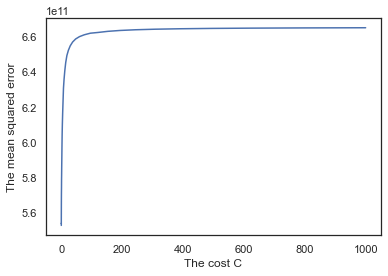

In [320]:
plot_mse(list_MSE_train)

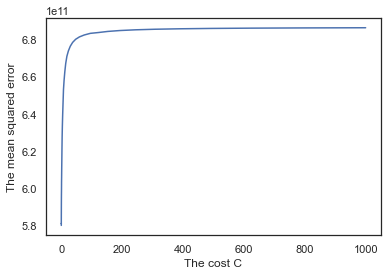

In [318]:
plot_mse(list_MSE_val)

### 5. What is the value for your hyperparameter ? 

## 4.3 Select your model
Now that you have selected, both for the random forest and for the SVM the values of the
hyperparameters that produce the best fits on the validation set, you can select the model that
gives the best results on the test set.

### 1. Compute the MSE on the test set for the random forest with the selected values for the hyperparameters.

In [ ]:
regr = RandomForestRegressor(max_features = 1,  n_estimators = 70, min_samples_leaf = 2)
#train model
regr.fit(X_train_val, y_train_val)
prediction_random = svc.predict(X_test)
#calculate MSE
mse = mean_squared_error(y_test, prediction_random)

### 2. Do the same for your best SVM.

### 3. Which model gives the best results on the test set? Comment.